# Comparison : Metropolis Hastings and Hamiltonian Monte Carlo

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from Distribution import *
from Kernel import *
from MCMC import *
from Integrator import *
import matplotlib.pyplot as plt

In [10]:
# Distribution to sample
distribution = Normal(mu=0, sigma=1)
# distribution = Gamma(a=1,b=1)

# Kernel for Metropolis Hastings
kernel = Gaussian_kernel(std=2.5)

# Integrator for Hamiltonian Monte Carlo
integrator = Verlet(distribution, h=0.05, n=10)

# Initial value
params = {'init':1}

# Metropolis Hastings algorithm
mh = MH(distribution, kernel, params)

# Hamiltonian Monte Carlo algorithm
hmc = HMC(distribution, integrator, params)

In [11]:
# Run Metropolis Hastings
mh.run(10000)

In [12]:
# Run Hamiltonian Monte Carlo
hmc.run(10000)

In [13]:
# Acceptation rates
print("Taux acceptation MH : {} %".format(round(100*mh.accept,3)))
print("Taux acceptation HMC : {} %".format(round(100*hmc.accept,3)))

Taux acceptation MH : 43.62 %
Taux acceptation HMC : 85.74 %


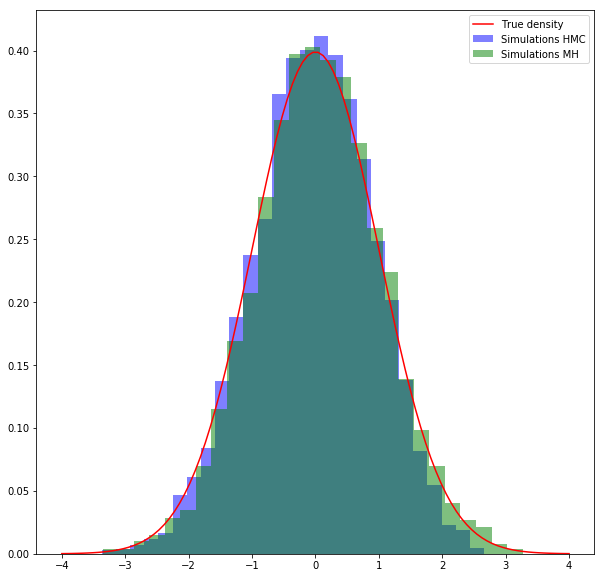

In [14]:
# Histograms
plt.figure(figsize = (10,10))
x = np.linspace(-4,4,100)
plt.plot(x, hmc.distribution.pdf(x), color = 'r', label = 'True density')
plt.hist(np.array(hmc.saved_values), bins = int((2*len(mh.saved_values))**(1/3)),density = True, color='b', label = 'Simulations HMC', alpha=0.5)
plt.hist(np.array(mh.saved_values), bins = int((2*len(mh.saved_values))**(1/3)),density = True, color='g', label = 'Simulations MH', alpha=0.5)
plt.legend()
plt.show()

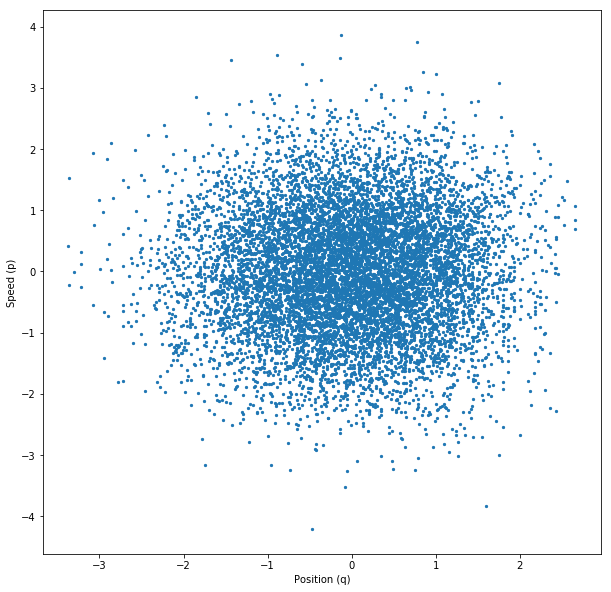

In [23]:
# HMC : exploration of the space in terms of velocity and positions
plt.figure(figsize = (10,10))
plt.scatter(hmc.integrator.saved_q, hmc.integrator.saved_p, s=5)
plt.xlabel("Position (q)")
plt.ylabel("Speed (p)")
plt.show()